## File to merge building footprints with assets
Source footprint file is too large so I do not push it to the repository. Download the geojson here:
https://openac-alcogis.opendata.arcgis.com/datasets/AlCoGIS::allegheny-county-building-footprint-locations/explore?filters=eyJDTEFTUyI6WyJSIl19&location=40.462063%2C-79.916146%2C16.82

Grocery stores are obtained here: 
https://data.wprdc.org/dataset/allegheny-county-assets 

In [6]:
import geopandas as gpd
import pandas as pd
#import folium
import matplotlib.pyplot as plt

In [7]:
footprint = gpd.read_file('C:/Users/jacar/OneDrive/Documents/GitHub/Food-Access/input_data/spatial_data/Allegheny_County_Building_Footprint_Locations.geojson')

In [8]:
#footprint.plot()

In [9]:
non_residential = footprint.loc[footprint['CLASS'] != 'R']

In [10]:
assets_pre = pd.read_csv('C:/Users/jacar/OneDrive/Documents/GitHub/Food-Access/input_data/spatial_data/Allegheny_county_assets.csv')
assets = gpd.GeoDataFrame(
    assets_pre, geometry=gpd.points_from_xy(assets_pre.longitude, assets_pre.latitude)
).set_crs(4326, allow_override=True)

<ipython-input-10-e2c46793d75b>:1: DtypeWarning: Columns (2,7,16,19,20,24,28,29,41) have mixed types. Specify dtype option on import or set low_memory=False.
  assets_pre = pd.read_csv('C:/Users/jacar/OneDrive/Documents/GitHub/Food-Access/input_data/spatial_data/Allegheny_county_assets.csv')


<AxesSubplot:>

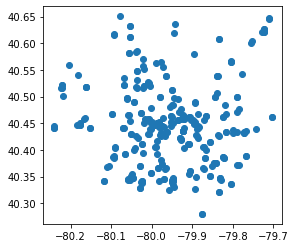

In [11]:
# Get food access points
assets = assets[['name','latitude','longitude','asset_type','geometry']]
food = assets.loc[assets['asset_type'].isin(['supermarkets','wic_vendors','food_banks'])]
food.plot()

In [12]:
# Now merge the two, evaluate merge between non-residential buildings and food assets
food_with_building = non_residential.sjoin(food, how="inner", predicate='intersects')

In [13]:
food_with_building

,OBJECTID,status,prev_area,pct_change,CLASS,LUC,FEATURECODE,ShapeSTArea,ShapeSTLength,geometry,index_right,name,latitude,longitude,asset_type
7118,7119,existing,0.000000,0.000000,C,421,220.0,70495.713196,1229.987448,"POLYGON ((-80.09813 40.46787, -80.09782 40.467...",20663,Giant Eagle #2,40.467789,-80.097643,supermarkets
7118,7119,existing,0.000000,0.000000,C,421,220.0,70495.713196,1229.987448,"POLYGON ((-80.09813 40.46787, -80.09782 40.467...",3178,Giant Eagle,40.467789,-80.097643,wic_vendors
10796,10797,changed,41725.198660,36.692013,G,620,220.0,57034.986450,1114.639512,"POLYGON ((-80.21872 40.50224, -80.21875 40.501...",6194,Pittsburgh Commissary,40.501871,-80.218441,wic_vendors
13454,13455,existing,0.000000,0.000000,C,425,220.0,169464.519348,2851.865670,"POLYGON ((-80.22009 40.52127, -80.22006 40.521...",20659,Giant Eagle #068,40.521774,-80.220563,supermarkets
13454,13455,existing,0.000000,0.000000,C,425,220.0,169464.519348,2851.865670,"POLYGON ((-80.22009 40.52127, -80.22006 40.521...",3184,Giant Eagle,40.521774,-80.220563,wic_vendors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571402,571403,existing,0.000000,0.000000,C,404,220.0,18014.639893,897.691759,"POLYGON ((-79.95206 40.45247, -79.95222 40.452...",20173,Bombay Market,40.452147,-79.951784,supermarkets
572480,572481,existing,0.000000,0.000000,C,404,250.0,31394.349854,1170.599682,"POLYGON ((-79.94897 40.46202, -79.94895 40.462...",19895,Donatelli's Italian Food Center,40.462148,-79.949342,supermarkets
573657,573658,existing,0.000000,0.000000,C,550,NaN,44041.368591,1399.672591,"POLYGON ((-79.92347 40.43682, -79.92419 40.436...",32895,Jewish Family and Children's Services - emerge...,40.436261,-79.923848,food_banks
573788,573789,existing,0.000000,0.000000,C,685,NaN,10111.535889,608.323553,"POLYGON ((-79.92410 40.46451, -79.92375 40.464...",32872,Crossroads Church East Liberty Free Store,40.464460,-79.923735,food_banks


In [14]:
food

,name,latitude,longitude,asset_type,geometry
175,Shop N Save Village,40.365041,-79.871306,wic_vendors,POINT (-79.87131 40.36504)
998,Target,40.342710,-80.053342,wic_vendors,POINT (-80.05334 40.34271)
2702,Giant Eagle #47 / Market District Robinson,40.441638,-80.151349,supermarkets,POINT (-80.15135 40.44164)
3040,Giant Eagle,40.451231,-80.000951,wic_vendors,POINT (-80.00095 40.45123)
3041,Giant Eagle,40.456605,-79.934365,wic_vendors,POINT (-79.93437 40.45661)
...,...,...,...,...,...
32933,UPMC Family Care Connection - Lawrenceville,40.481165,-79.954010,food_banks,POINT (-79.95401 40.48116)
32934,West Mifflin Food Bank @ Walnut Grove Christia...,40.355117,-79.908657,food_banks,POINT (-79.90866 40.35512)
32935,Welcome Little One,40.439559,-80.001769,food_banks,POINT (-80.00177 40.43956)
32936,West Allegheny Food Pantry,40.443835,-80.240623,food_banks,POINT (-80.24062 40.44383)


Looks like not all of our points hit a parcel. Let's see if that changes if we include residential buildings. Then, let's try to view a more complete map using folium:
https://geopandas.org/en/stable/gallery/plotting_with_folium.html

https://www.youtube.com/watch?v=xerlQ3tE8Ew can guide an exploration that allows us to check individual points in geojson

In [15]:
food_with_allbuilding = footprint.sjoin(food, how="inner", predicate='intersects')
food_with_allbuilding # nope, we only get two more that are classified.
# next, check to see why

,OBJECTID,status,prev_area,pct_change,CLASS,LUC,FEATURECODE,ShapeSTArea,ShapeSTLength,geometry,index_right,name,latitude,longitude,asset_type
7118,7119,existing,0.000000,0.000000,C,421,220.0,70495.713196,1229.987448,"POLYGON ((-80.09813 40.46787, -80.09782 40.467...",20663,Giant Eagle #2,40.467789,-80.097643,supermarkets
7118,7119,existing,0.000000,0.000000,C,421,220.0,70495.713196,1229.987448,"POLYGON ((-80.09813 40.46787, -80.09782 40.467...",3178,Giant Eagle,40.467789,-80.097643,wic_vendors
10796,10797,changed,41725.198660,36.692013,G,620,220.0,57034.986450,1114.639512,"POLYGON ((-80.21872 40.50224, -80.21875 40.501...",6194,Pittsburgh Commissary,40.501871,-80.218441,wic_vendors
13454,13455,existing,0.000000,0.000000,C,425,220.0,169464.519348,2851.865670,"POLYGON ((-80.22009 40.52127, -80.22006 40.521...",20659,Giant Eagle #068,40.521774,-80.220563,supermarkets
13454,13455,existing,0.000000,0.000000,C,425,220.0,169464.519348,2851.865670,"POLYGON ((-80.22009 40.52127, -80.22006 40.521...",3184,Giant Eagle,40.521774,-80.220563,wic_vendors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571402,571403,existing,0.000000,0.000000,C,404,220.0,18014.639893,897.691759,"POLYGON ((-79.95206 40.45247, -79.95222 40.452...",20173,Bombay Market,40.452147,-79.951784,supermarkets
572480,572481,existing,0.000000,0.000000,C,404,250.0,31394.349854,1170.599682,"POLYGON ((-79.94897 40.46202, -79.94895 40.462...",19895,Donatelli's Italian Food Center,40.462148,-79.949342,supermarkets
573657,573658,existing,0.000000,0.000000,C,550,NaN,44041.368591,1399.672591,"POLYGON ((-79.92347 40.43682, -79.92419 40.436...",32895,Jewish Family and Children's Services - emerge...,40.436261,-79.923848,food_banks
573788,573789,existing,0.000000,0.000000,C,685,NaN,10111.535889,608.323553,"POLYGON ((-79.92410 40.46451, -79.92375 40.464...",32872,Crossroads Church East Liberty Free Store,40.464460,-79.923735,food_banks


,OBJECTID,status,prev_area,pct_change,CLASS,LUC,FEATURECODE,ShapeSTArea,ShapeSTLength,geometry
0,1,existing,0.0,0.0,R,10,210.0,1212.271606,169.257366,"POLYGON ((-80.05746 40.47318, -80.05766 40.473..."
1,2,existing,0.0,0.0,R,100,240.0,412.497681,83.233577,"POLYGON ((-80.11407 40.47561, -80.11401 40.475..."
2,3,existing,0.0,0.0,R,10,210.0,1589.537048,179.985901,"POLYGON ((-80.21867 40.55247, -80.21868 40.552..."
3,4,existing,0.0,0.0,R,10,NaN,202.943726,57.228336,"POLYGON ((-80.21853 40.55198, -80.21852 40.552..."
4,5,existing,0.0,0.0,R,10,240.0,436.982849,83.744503,"POLYGON ((-80.06964 40.47020, -80.06959 40.470..."
...,...,...,...,...,...,...,...,...,...,...
573903,573904,existing,0.0,0.0,R,10,NaN,365.321777,77.302349,"POLYGON ((-79.91586 40.44732, -79.91582 40.447..."
573904,573905,existing,0.0,0.0,R,10,250.0,750.171387,109.624325,"POLYGON ((-79.91540 40.44642, -79.91545 40.446..."
573905,573906,existing,0.0,0.0,R,100,NaN,166.766388,51.773458,"POLYGON ((-79.91768 40.39478, -79.91770 40.394..."
573906,573907,existing,0.0,0.0,R,20,NaN,357.778198,76.216986,"POLYGON ((-79.92091 40.43146, -79.92090 40.431..."
